In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from collections import Counter
from scipy.stats import chisquare, ks_2samp

# Carica il CSV unificato
df = pd.read_csv('datasets/data-out/superenalotto_unito.csv', parse_dates=['Data'])



# 🎯 Analisi del SuperEnalotto
Un progetto di Scienza dei Dati


## Obiettivi
- Ci sono numeri o coppie più frequenti?
- La distribuzione è veramente casuale?
- Possiamo simulare estrazioni e confrontarle con quelle reali?


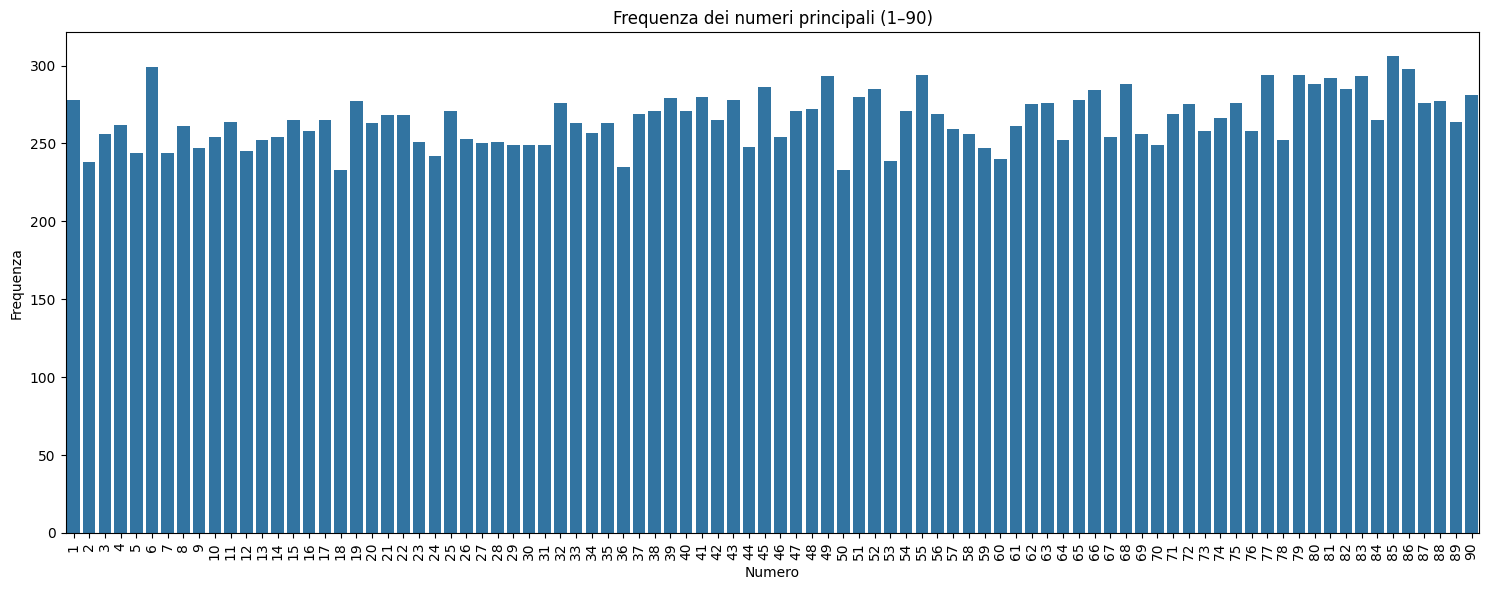

In [29]:

main_numbers = df[['N1', 'N2', 'N3', 'N4', 'N5', 'N6']].values.flatten()
counts = pd.Series(main_numbers).value_counts().sort_index()
plt.figure(figsize=(15,6))
sns.barplot(x=counts.index, y=counts.values)
plt.title("Frequenza dei numeri principali (1–90)")
plt.xlabel("Numero")
plt.ylabel("Frequenza")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


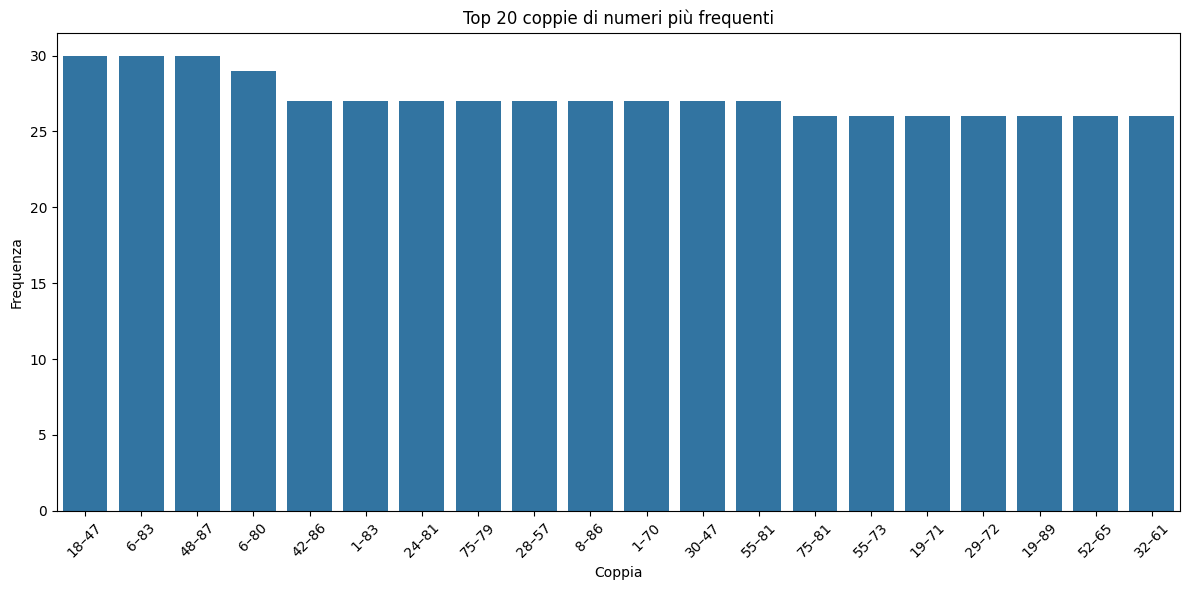

In [30]:
all_combos = []
for row in df[['N1', 'N2', 'N3', 'N4', 'N5', 'N6']].values:
    all_combos.extend(combinations(sorted(row), 2))

# Conta le frequenze delle coppie
combo_counts = Counter(all_combos)
top_pairs = pd.DataFrame(combo_counts.most_common(20), columns=['Coppia', 'Frequenza'])

# Converti le coppie in stringhe leggibili tipo "12–45"
top_pairs['Coppia_str'] = top_pairs['Coppia'].apply(lambda x: f"{x[0]}–{x[1]}")

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_pairs['Coppia_str'], y=top_pairs['Frequenza'])
plt.title("Top 20 coppie di numeri più frequenti")
plt.xlabel("Coppia")
plt.ylabel("Frequenza")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


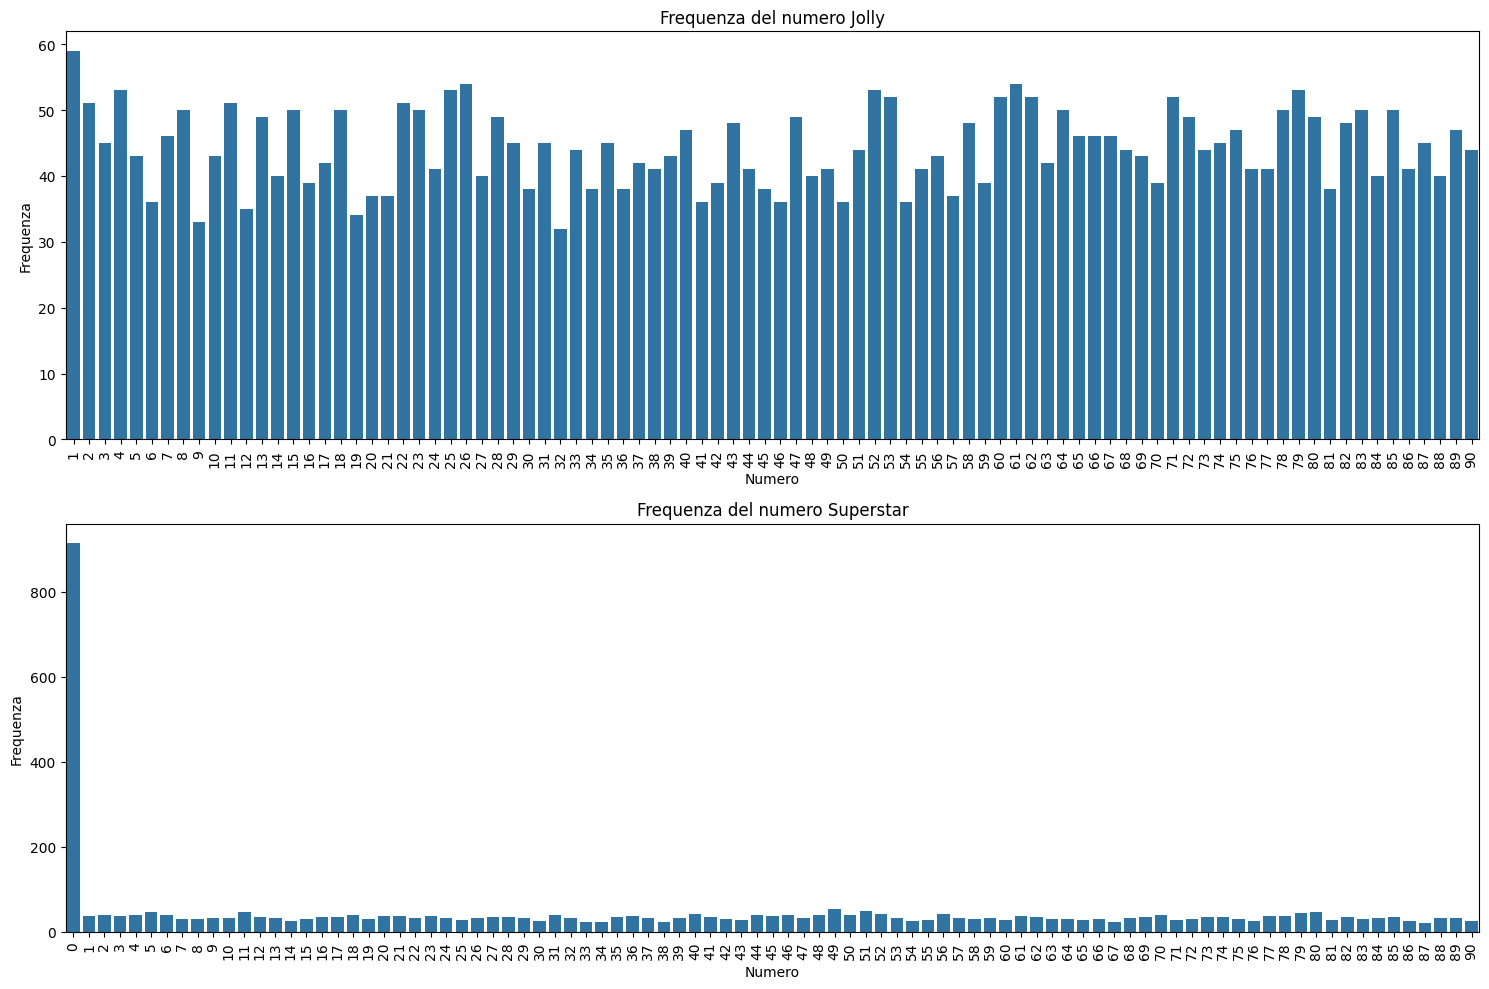

In [31]:

fig, axes = plt.subplots(2, 1, figsize=(15,10))
for i, col in enumerate(['Jolly', 'Superstar']):
    counts = df[col].value_counts().sort_index()
    sns.barplot(ax=axes[i], x=counts.index, y=counts.values)
    axes[i].set_title(f"Frequenza del numero {col}")
    axes[i].set_xlabel("Numero")
    axes[i].set_ylabel("Frequenza")
    axes[i].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()


In [32]:
main_numbers = df[['N1', 'N2', 'N3', 'N4', 'N5', 'N6']].values.flatten()
counts = pd.Series(main_numbers).value_counts().sort_index()

# Simulazione casuale
all_sim = []
for _ in range(len(df)):
    sim = np.random.choice(range(1, 91), size=6, replace=False)
    all_sim.extend(sim)
sim_counts = pd.Series(all_sim).value_counts().sort_index()

# --- TEST CHI QUADRATO ---
expected = np.full(shape=90, fill_value=len(main_numbers) / 90)
chi2_stat, chi2_p = chisquare(f_obs=counts.values, f_exp=expected)

# --- TEST KS ---
ks_stat, ks_p = ks_2samp(counts.values, sim_counts.values)

# --- RISULTATI ---
print(f"📊 Test del Chi Quadrato:")
print(f"   Statistica = {chi2_stat:.2f}")
print(f"   p-value    = {chi2_p:.4f}")

if chi2_p > 0.05:
    print("   ✅ La distribuzione osservata è compatibile con una distribuzione uniforme (casualità confermata).")
else:
    print("   ⚠️ Differenza significativa dalla distribuzione uniforme: potenziale pattern o anomalia.")

print("\n📊 Test di Kolmogorov-Smirnov:")
print(f"   Statistica = {ks_stat:.4f}")
print(f"   p-value    = {ks_p:.4f}")

if ks_p > 0.05:
    print("   ✅ La distribuzione reale è simile a quella simulata (nessuna differenza significativa).")
else:
    print("   ⚠️ La distribuzione reale è diversa dalla simulazione casuale (possibile deviazione dalla casualità).")

📊 Test del Chi Quadrato:
   Statistica = 94.49
   p-value    = 0.3251
   ✅ La distribuzione osservata è compatibile con una distribuzione uniforme (casualità confermata).

📊 Test di Kolmogorov-Smirnov:
   Statistica = 0.0778
   p-value    = 0.9502
   ✅ La distribuzione reale è simile a quella simulata (nessuna differenza significativa).


In [33]:
df['GiornoDelMese'] = df['Data'].dt.day

In [34]:
frequenze_per_giorno = {}

for giorno in range(1, 32):
    subset = df[df['GiornoDelMese'] == giorno]
    numeri = subset[['N1', 'N2', 'N3', 'N4', 'N5', 'N6']].values.flatten()
    frequenze_per_giorno[giorno] = Counter(numeri)qui

SyntaxError: invalid syntax (478293406.py, line 6)

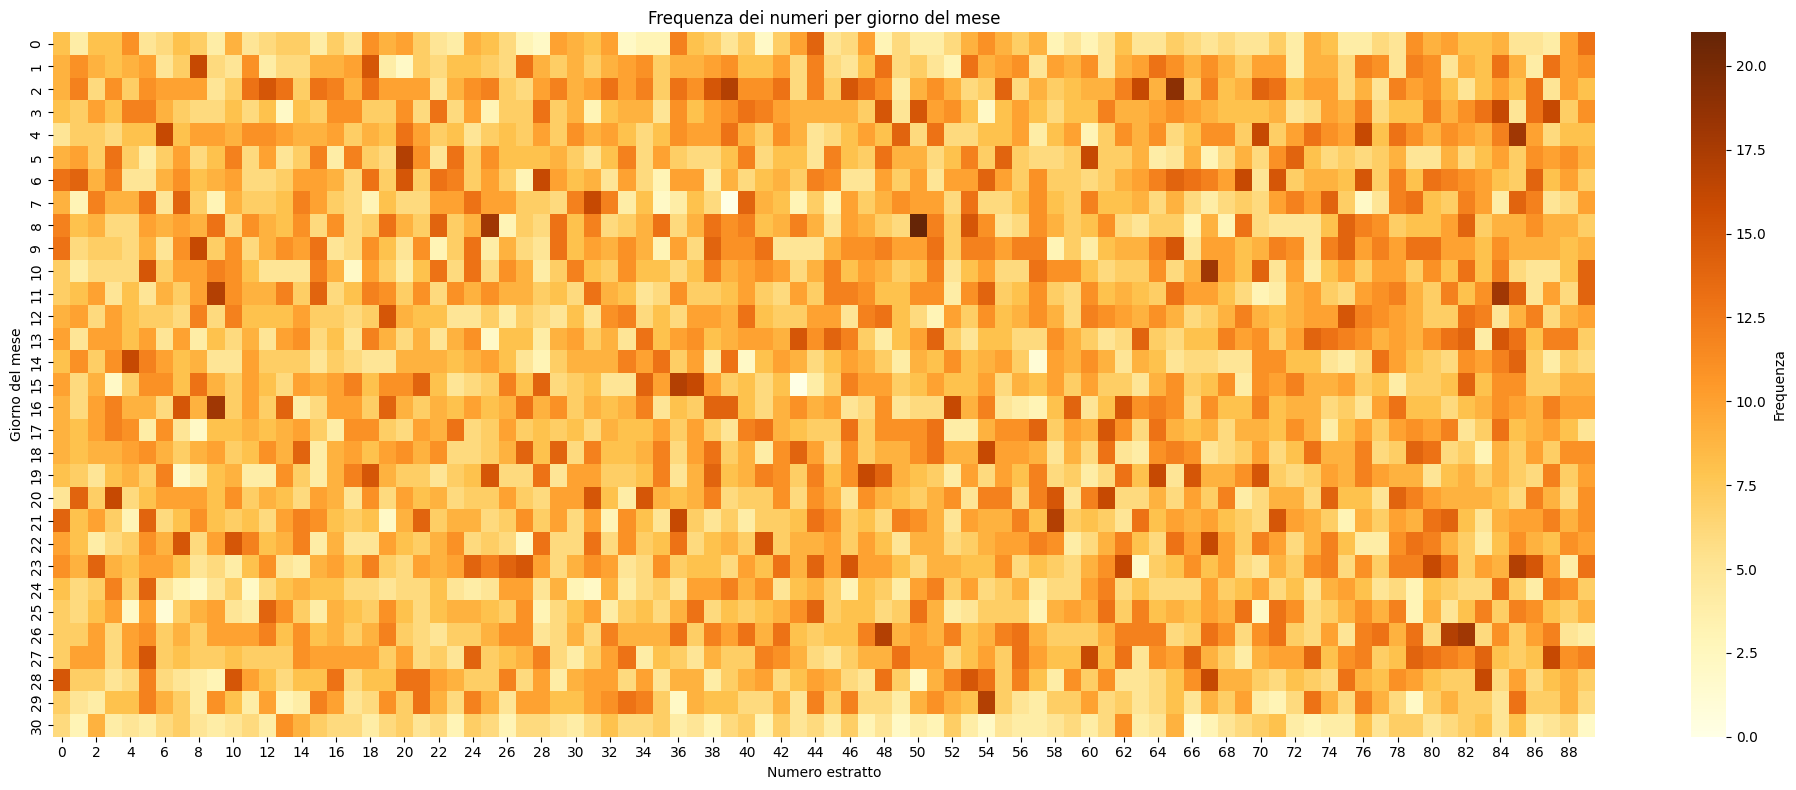

In [ ]:
heatmap_data = np.zeros((31, 90))

for giorno, counter in frequenze_per_giorno.items():
    for num in range(1, 91):
        heatmap_data[giorno - 1, num - 1] = counter.get(num, 0)

plt.figure(figsize=(20, 8))
sns.heatmap(heatmap_data, cmap="YlOrBr", cbar_kws={'label': 'Frequenza'})
plt.xlabel("Numero estratto")
plt.ylabel("Giorno del mese")
plt.title("Frequenza dei numeri per giorno del mese")
plt.tight_layout()
plt.show()

/var/folders/r5/qp675m211tbf65rrxcgv06840000gp/T/ipykernel_33134/2250320045.py:29: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/mehdizahid/Desktop/UNIVER/Sec SEMEST/SCIENZA DEI DATI/super-enalotto/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


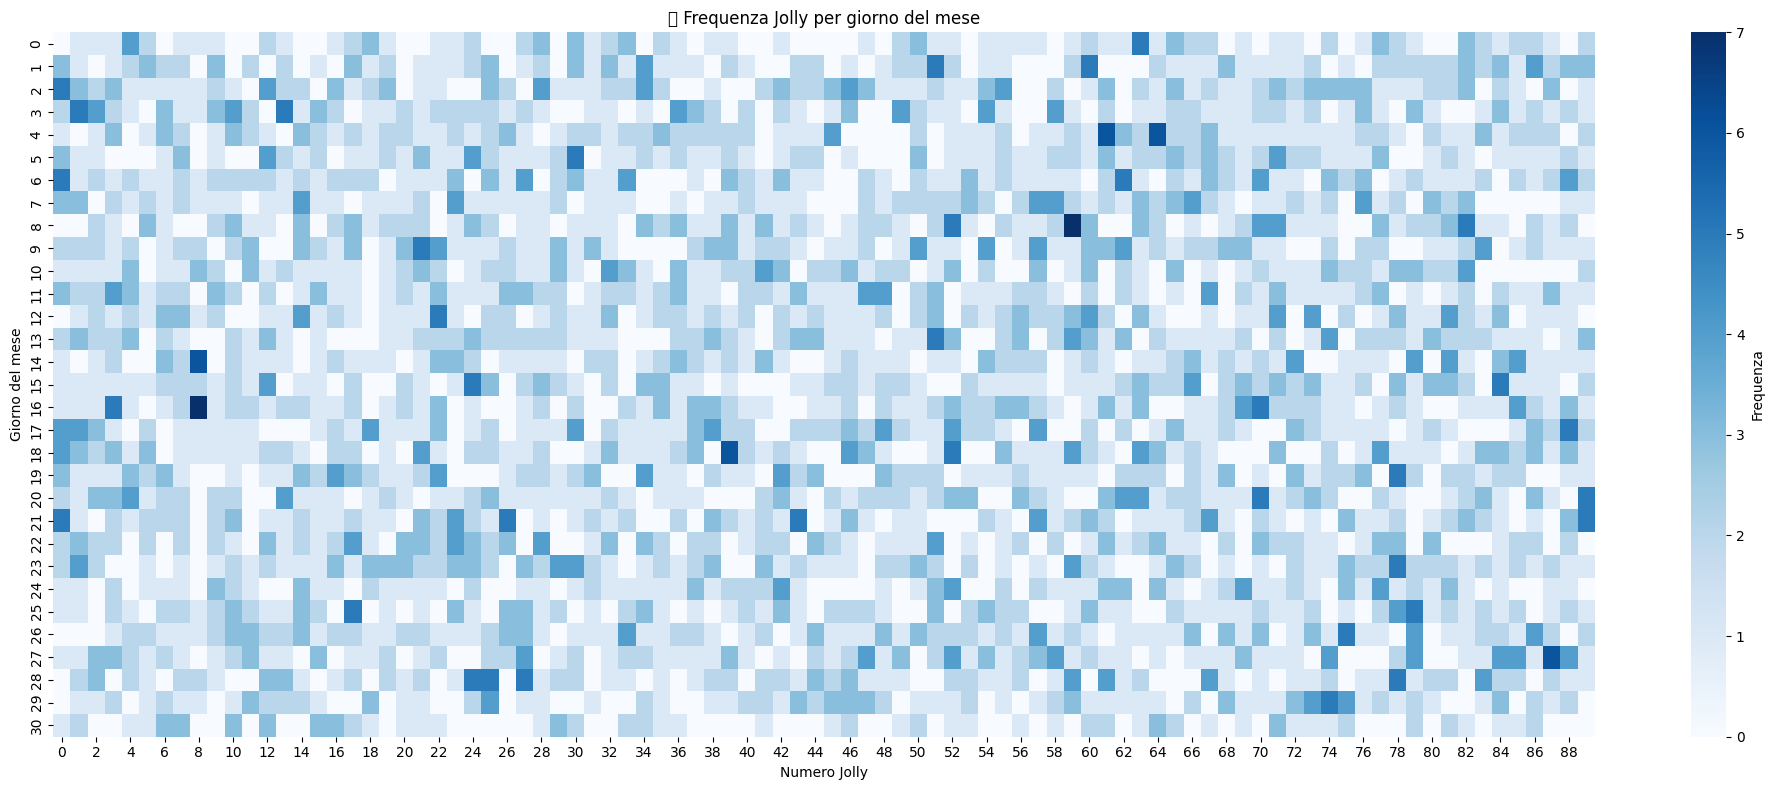

/var/folders/r5/qp675m211tbf65rrxcgv06840000gp/T/ipykernel_33134/2250320045.py:38: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/mehdizahid/Desktop/UNIVER/Sec SEMEST/SCIENZA DEI DATI/super-enalotto/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


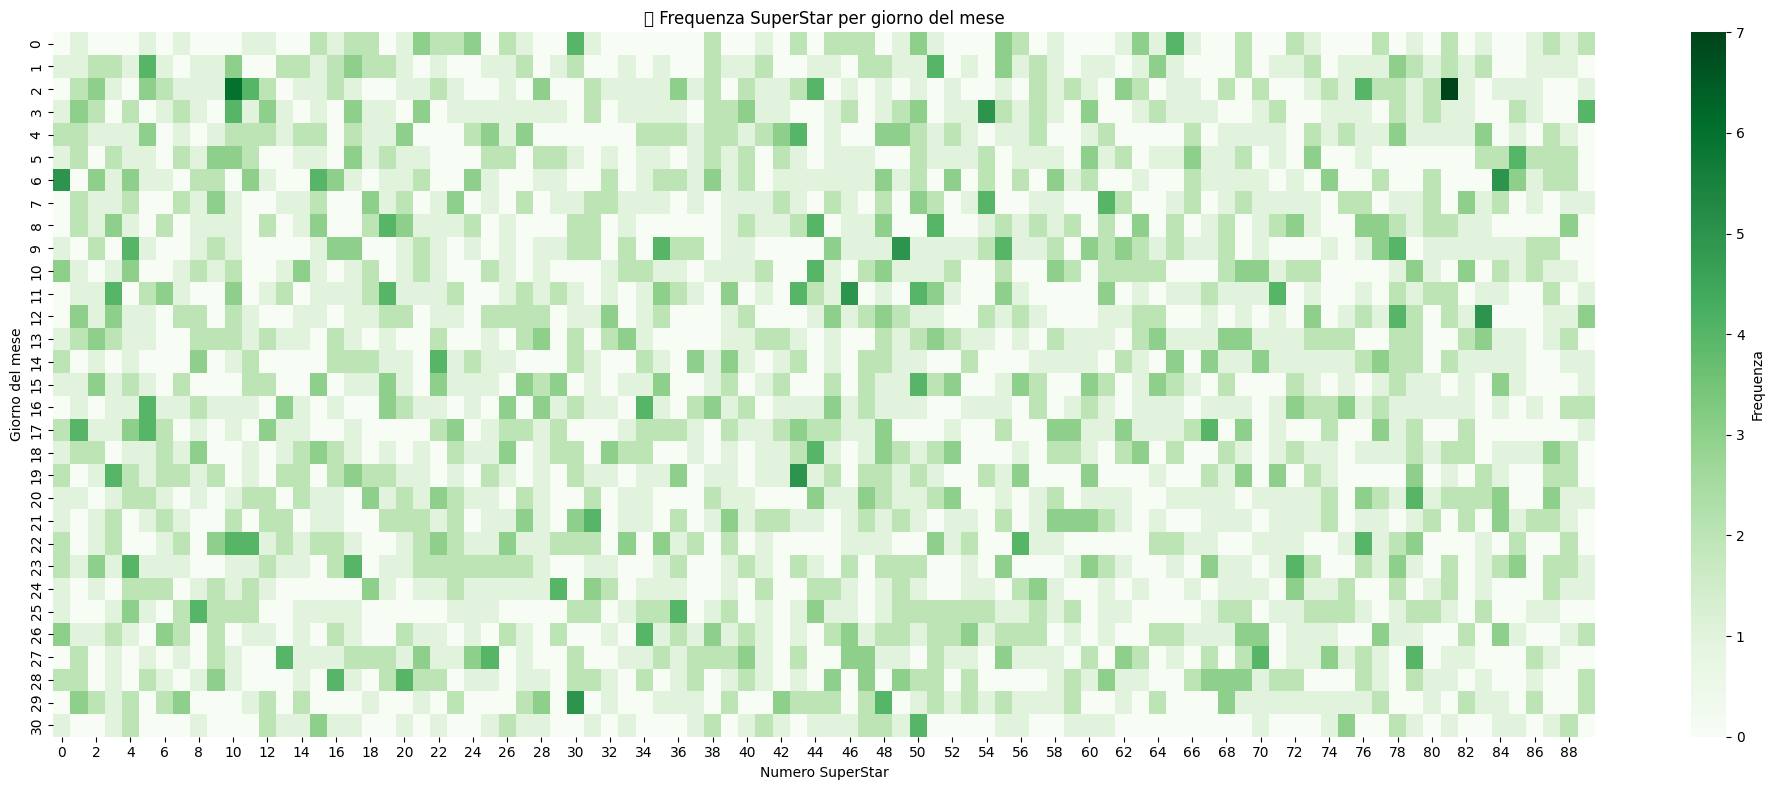

In [ ]:
df['GiornoDelMese'] = df['Data'].dt.day

# JOLLY
jolly_counts = np.zeros((31, 90))

for giorno in range(1, 32):
    valori = df[df['GiornoDelMese'] == giorno]['Jolly'].dropna().astype(int)
    conteggio = Counter(valori)
    for num, freq in conteggio.items():
        if 1 <= num <= 90:
            jolly_counts[giorno - 1, num - 1] = freq

# SUPERSTAR
superstar_counts = np.zeros((31, 90))

for giorno in range(1, 32):
    valori = df[df['GiornoDelMese'] == giorno]['Superstar'].dropna().astype(int)
    conteggio = Counter(valori)
    for num, freq in conteggio.items():
        if 1 <= num <= 90:
            superstar_counts[giorno - 1, num - 1] = freq

# PLOT JOLLY
plt.figure(figsize=(20, 8))
sns.heatmap(jolly_counts, cmap="Blues", cbar_kws={'label': 'Frequenza'})
plt.title("📊 Frequenza Jolly per giorno del mese")
plt.xlabel("Numero Jolly")
plt.ylabel("Giorno del mese")
plt.tight_layout()
plt.show()

# PLOT SUPERSTAR
plt.figure(figsize=(20, 8))
sns.heatmap(superstar_counts, cmap="Greens", cbar_kws={'label': 'Frequenza'})
plt.title("📊 Frequenza SuperStar per giorno del mese")
plt.xlabel("Numero SuperStar")
plt.ylabel("Giorno del mese")
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import pearsonr, spearmanr, kendalltau

# Calcola la somma dei sei numeri principali
df['Somma'] = df[['N1', 'N2', 'N3', 'N4', 'N5', 'N6']].sum(axis=1)

# Ora puoi confrontare la somma con il Jolly
pearson = pearsonr(df['Somma'], df['Jolly'])
spearman = spearmanr(df['Somma'], df['Jolly'])
kendall = kendalltau(df['Somma'], df['Jolly'])

print(f"📊 Pearson:  ρ = {pearson[0]:.4f}, p = {pearson[1]:.2e}")
print(f"📊 Spearman: ρ = {spearman[0]:.4f}, p = {spearman[1]:.2e}")
print(f"📊 Kendall:  τ = {kendall[0]:.4f}, p = {kendall[1]:.2e}")

📊 Pearson:  ρ = -0.0309, p = 5.13e-02
📊 Spearman: ρ = -0.0304, p = 5.51e-02
📊 Kendall:  τ = -0.0205, p = 5.41e-02
